In [1]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.rcParams["figure.dpi"] = 200

In [2]:
# PCD columns
pcd_col = {
    "X": 0,
    "Y": 1,
    "Z": 2,
    "CURVATURE_SCL": 3,
    "CURVATURE_3D_01": 4,
    "CURVATURE_3D_02": 5,
    "CURVATURE_3D_05": 6,
    "CURVATURE_3D_1": 7
}

pcd_col = SimpleNamespace(**pcd_col)

In [24]:
path = "/Users/luiskremer/Code/Uni/Code_Master_RSIV/019_scanline_segmentation/data/analysis/a01_curvature/SiteD_RHV_01_A01_Curvature_XYZ_k15.txt"
pcd = np.loadtxt(path, delimiter=" ")

pcd = pcd[pcd[:, pcd_col.CURVATURE_3D_01] != 0]

In [25]:
pcd.shape

(159391, 8)

In [23]:
np.where(pcd[:, pcd_col.CURVATURE_3D_05] == 0)[0].shape

(5527,)

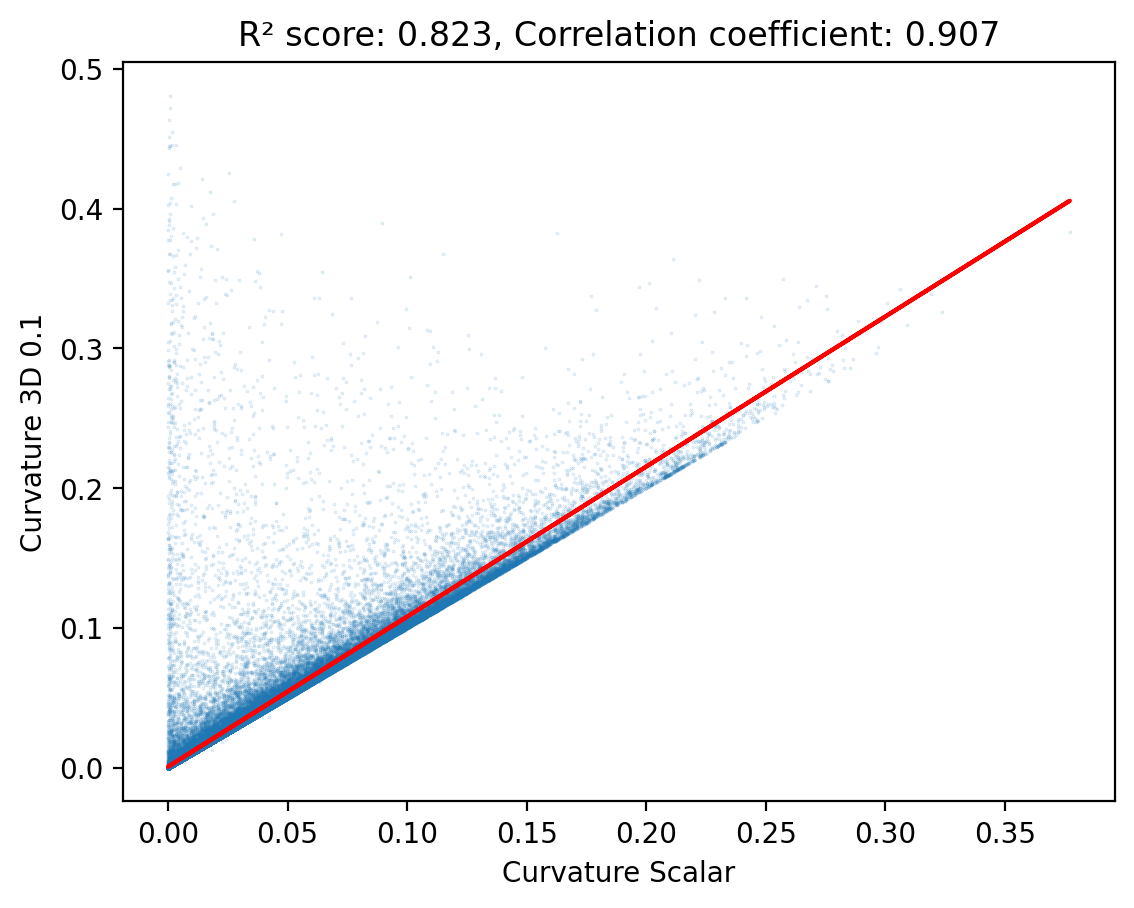

In [51]:
# Create a LinearRegression object
reg = LinearRegression()

# Fit the model to your data
X = np.abs(pcd[:, pcd_col.CURVATURE_3D_05]).reshape(-1, 1)
y = np.abs(pcd[:, -1])
reg.fit(X, y)

# Compute the R² score
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Compute the correlation coefficient
corr_coef = np.corrcoef(X.squeeze(), y)[0, 1]

# Plot the data and the regression line
plt.scatter(X, y, s=0.1, alpha=0.2)
plt.plot(X, y_pred, color='red')
plt.xlabel("Curvature Scalar")
plt.ylabel("Curvature 3D 0.1")
plt.title(f"R² score: {r2:.3f}, Correlation coefficient: {corr_coef:.3f}")
plt.show()

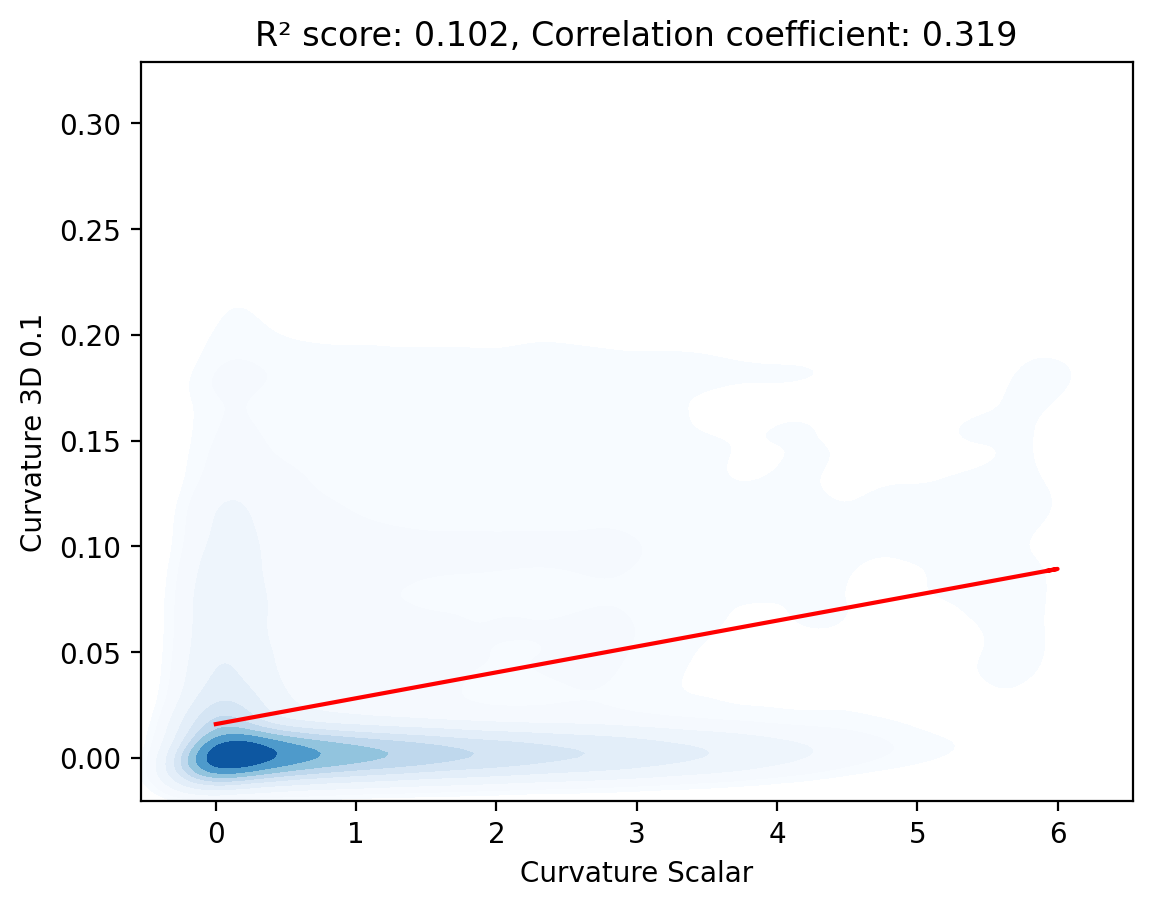

In [14]:
import seaborn as sns

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model to your data
X = np.abs(pcd[:, pcd_col.CURVATURE_SCL]).reshape(-1, 1)
y = pcd[:, pcd_col.CURVATURE_3D_1]
reg.fit(X, y)

# Compute the R² score
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

# Compute the correlation coefficient
corr_coef = np.corrcoef(X.squeeze(), y)[0, 1]

# Plot the data and the regression line using seaborn
sns.kdeplot(x=X.squeeze(), y=y, cmap="Blues", fill=True)
plt.plot(X, y_pred, color='red')
plt.xlabel("Curvature Scalar")
plt.ylabel("Curvature 3D 0.1")
plt.title(f"R² score: {r2:.3f}, Correlation coefficient: {corr_coef:.3f}")
plt.show()

In [30]:
path = "/Users/luiskremer/Code/Uni/Code_Master_RSIV/019_scanline_segmentation/data/analysis/a01_curvature/SiteD_RHV_01_A01_Curvature_CC.txt"

pcd = np.loadtxt(path, delimiter=" ")

pcd = pcd[pcd[:, pcd_col.CURVATURE_3D_01] != 0]

In [50]:
# delte where curvature of is pcd[:, -1] is nan
pcd = pcd[~np.isnan(pcd[:, -1])]

In [48]:
np.where(pcd[:, -1] == 'NaN')[0]

array([], dtype=int64)

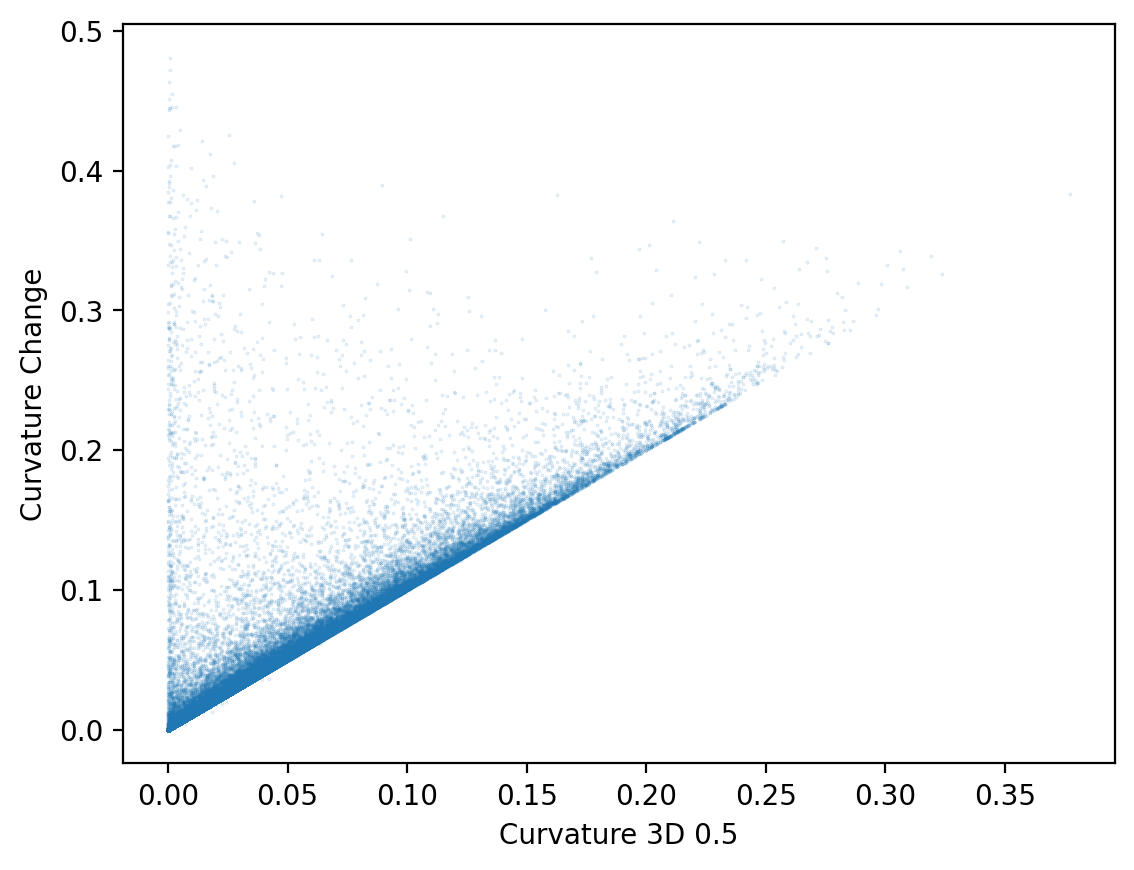

In [33]:
# plot pcd[:, pcd_col.CURVATURE_3D_05] against pcd[:, -1]
plt.scatter(pcd[:, pcd_col.CURVATURE_3D_05], np.abs(pcd[:, -1]), s=0.1, alpha=0.2)
plt.xlabel("Curvature 3D 0.5")
plt.ylabel("Curvature Change")
plt.show()